## Simple Linear Regression (단순 선형 회귀)

![](https://velog.velcdn.com/images/newnew_daddy/post/c28dac05-f1d1-44d5-8609-988d16c001a3/image.png)

#### 1. 개념
- **정의**: 단순 선형 회귀는 하나의 독립 변수와 하나의 종속 변수 간의 관계를 모델링하는 회귀 분석 방법
- **목적**: 독립 변수의 값에 따라 종속 변수의 값을 예측하고, 두 변수 간의 선형 관계를 파악

#### 2. 수학적 표현식
$$y = \beta_0 + \beta_1x + \epsilon$$

#### 3. 특징
- **선형성**: 독립 변수와 종속 변수 간의 관계가 선형으로 가정됨.
- **단순성**: 모델이 매우 단순하며 해석이 용이함.
- **한계**: 독립 변수와 종속 변수 간의 관계가 비선형일 경우 적합하지 않음.

#### 1. 데이터 Load

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./dataset/Salary_Data.csv')

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### 2. 학습데이터(X) - 타겟데이터(y) 분리

In [2]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape, y.shape

((30, 1), (30,))

#### 3. Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21, 1), (9, 1), (21,), (9,))

#### 4. 모델 Import

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#### 5. Train 데이터 학습

In [5]:
regressor.fit(X_train, y_train)

LinearRegression()

#### 6. test 데이터 예측

In [6]:
y_pred = regressor.predict(X_test)

y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [26]:
## 함수의 인자들 출력

print(regressor.coef_) ## x의 계수
print(regressor.intercept_) ## 상수

[9360.26128619]
26777.391341197632


In [25]:
y_pred_2 = X_test*regressor.coef_ + regressor.intercept_

y_pred_2

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [27]:
df_pred = pd.DataFrame({'test': y_test, 'pred': y_pred})

df_pred['error'] = df_pred['pred'] - df_pred['test']

df_pred

,test,pred,error
0,37731.0,40817.783270,3086.783270
1,122391.0,123188.082589,797.082589
2,57081.0,65154.462615,8073.462615
3,63218.0,63282.410357,64.410357
4,116969.0,115699.873560,-1269.126440
5,109431.0,108211.664531,-1219.335469
6,112635.0,116635.899689,4000.899689
7,55794.0,64218.436486,8424.436486
8,83088.0,76386.776158,-6701.223842


#### 7. 선형 회귀 그래프 시각화

In [10]:
X_test, y_test

(array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3]]),
 array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088.]))

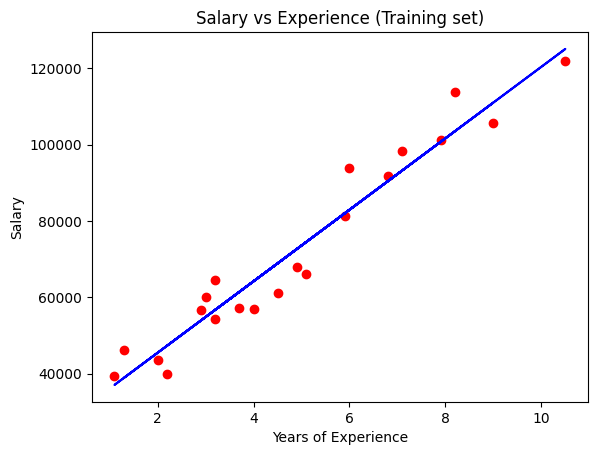

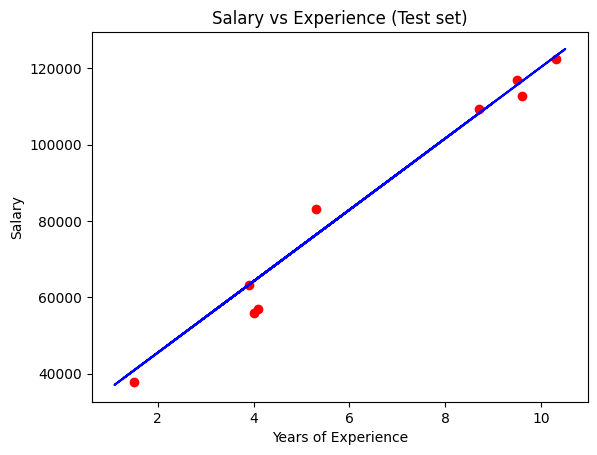

In [8]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
https://github.com/leeraejung/RaejungLecture-MachineLearning/blob/main/Lecture/104_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%8F%89%EA%B0%80.ipynb